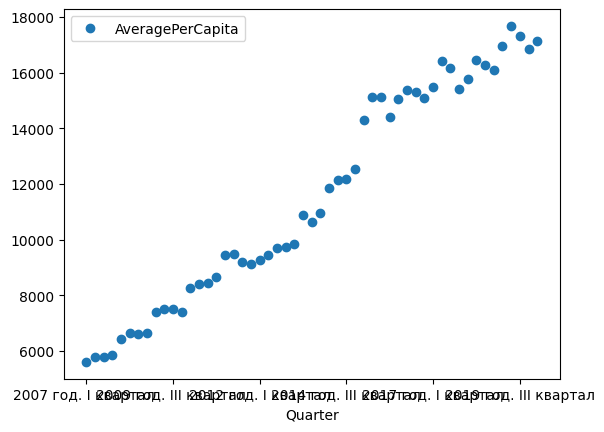

F_onewayResult(statistic=9.407847294851887, pvalue=0.002754290107684821)
различия есть


,Coefficient
ID,3.512751
WorkingPopulation,0.681567
Seniors,-0.012691
Children,0.244617


In [5]:
'''Изучите данные по динамике изменения величины прожиточного минимума в городе Москве:
https://video.ittensive.com/math-stat/data-6048-2020-06-29.utf.csv
Проверьте, что значения AveragePerCapita не распределены нормально (через QQ-Plot или любым другим методом).
Проведите дисперсионный анализ для серий Seniors и Children и установите, с каким p-уровнем значимости средние 
этих серий различаются.
Постройте регрессионную модель AveragePerCapita от Quarter, WorkingPopulation, Seniors и Children. 
Выпишите коэффициенты линейной модели и сделайте предсказание на второй квартал 2020 года.'''

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy.stats as st
dataset = pd.read_csv('https://video.ittensive.com/math-stat/data-6048-2020-06-29.utf.csv', delimiter = ';')
dataset.head()

dataset.plot(x='Quarter', y='AveragePerCapita', style='o')
plt.show()

sen_=dataset['Seniors']
chi_=dataset['Children']
stats = st.f_oneway(sen_, chi_)
print(stats)
if stats[1]<0.5:
    if st.ttest_ind(sen_, chi_)[1]<0.05/2:
        print("различия есть")
else:
    print("Различий нет")

dataset.describe()
X=dataset[['ID', 'WorkingPopulation', 'Seniors', 'Children']]
y=dataset['AveragePerCapita']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df